#                                               Harry Potter’s Invisible Cloak

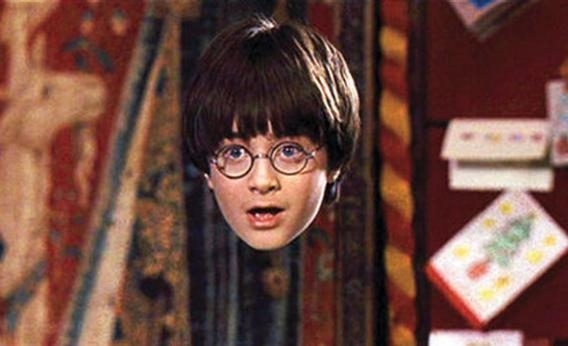

In [1]:
## How it works
#1. Importing needed libraries and generate the output video

#2. Recording and caching the background for each frame.

#3. detecting the red portion in each frame

#4. Replacing the red portion with a mask image in each frame

#5. Producing the surprising output

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
#Importing libraries
import numpy as np
import cv2
import time

In [ ]:
#Recording and caching the background for each frame.


cap=cv2.VideoCapture(0)#Read from the web cam

time.sleep(3) #for the system to sleep for 3 second before the webcam starts
for i in range(30):
    retval,back=cap.read()
back=np.flip(back,axis=1)
cap=cv2.VideoCapture(0)  



## detecting the red portion In each frame


while (cap.isOpened()):  ##Read every Frame from the webcam, until the camera is open 
    ret,img=cap.read()
    if ret:
        img=np.flip(img,axis=1)
        
        ##convert the color space from BGR to HSV
        hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
        
        ##Generat masks to detect red color
        lower_red = np.array([0,120,70])
        upper_red = np.array([10,255,255])
        mask1 = cv2.inRange(hsv,lower_red,upper_red)
        
        lower_red = np.array([170,120,70])
        upper_red = np.array([180,255,255])
        mask2 = cv2.inRange(hsv,lower_red,upper_red)
        mask1+=mask2
        
        ###Replacing the red portion with a mask image in each frame

        mask = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
        img[np.where(mask==255)]=back[np.where(mask==255)]
        
         #Final output
        cv2.imshow("Harry Potter's invisible secret revealed",img)
    key = cv2.waitKey(1)
    if key==ord("q"):
        break
cap.release()
cv2.destroyAllWindows()